In [58]:
TRAIN_PATH = ''
TEST_PATH = ''
labels_ = []

import library

In [59]:
import mediapipe as mp
import pandas as pd
import pickle
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score, f1_score, recall_score

import warnings
warnings.filterwarnings('ignore')

# Drawing helpers
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

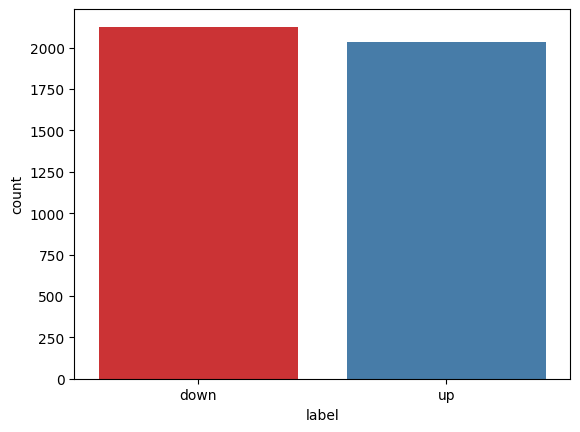

In [60]:
# Brief describe of the dataset
df = pd.read_csv(TRAIN_PATH)
sns.countplot(x='label', data=df, palette="Set1") 
df.loc[df["label"] == labels_[0], "label"] = 0
df.loc[df["label"] == labels_[1], "label"] = 1

In [61]:
# Extract features and class
X = df.drop("label", axis=1) # features
y = df["label"].astype("int")

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [63]:
with open("./models/squat_input_scaler.pkl", "wb") as f:
    pickle.dump(sc, f)

train ai

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [66]:
test_df = pd.read_csv(TEST_PATH)
test_df.loc[test_df["label"] == labels_[0], "label"] = 0
test_df.loc[test_df["label"] == labels_[1], "label"] = 1

test_x = test_df.drop("label", axis=1)
test_y = test_df["label"].astype("int")

In [67]:
y_predictions = LR.predict(test_x)

In [68]:
p_score = precision_score(test_y, y_predictions, labels=[0, 1], average=None)
r_score = recall_score(test_y, y_predictions, labels=[0, 1], average=None)
f1_score_result = f1_score(test_y, y_predictions, labels=[0, 1], average=None)

In [69]:
p_score, r_score, f1_score_result

(array([0.99303944, 0.99526066]),
 array([0.99534884, 0.9929078 ]),
 array([0.9941928 , 0.99408284]))

In [71]:
with open("./models/squat_counter.pkl", "wb") as f:
    pickle.dump(LR, f)